<a href="https://colab.research.google.com/github/zpalevani/Capstone3/blob/main/Capstone_3_~_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

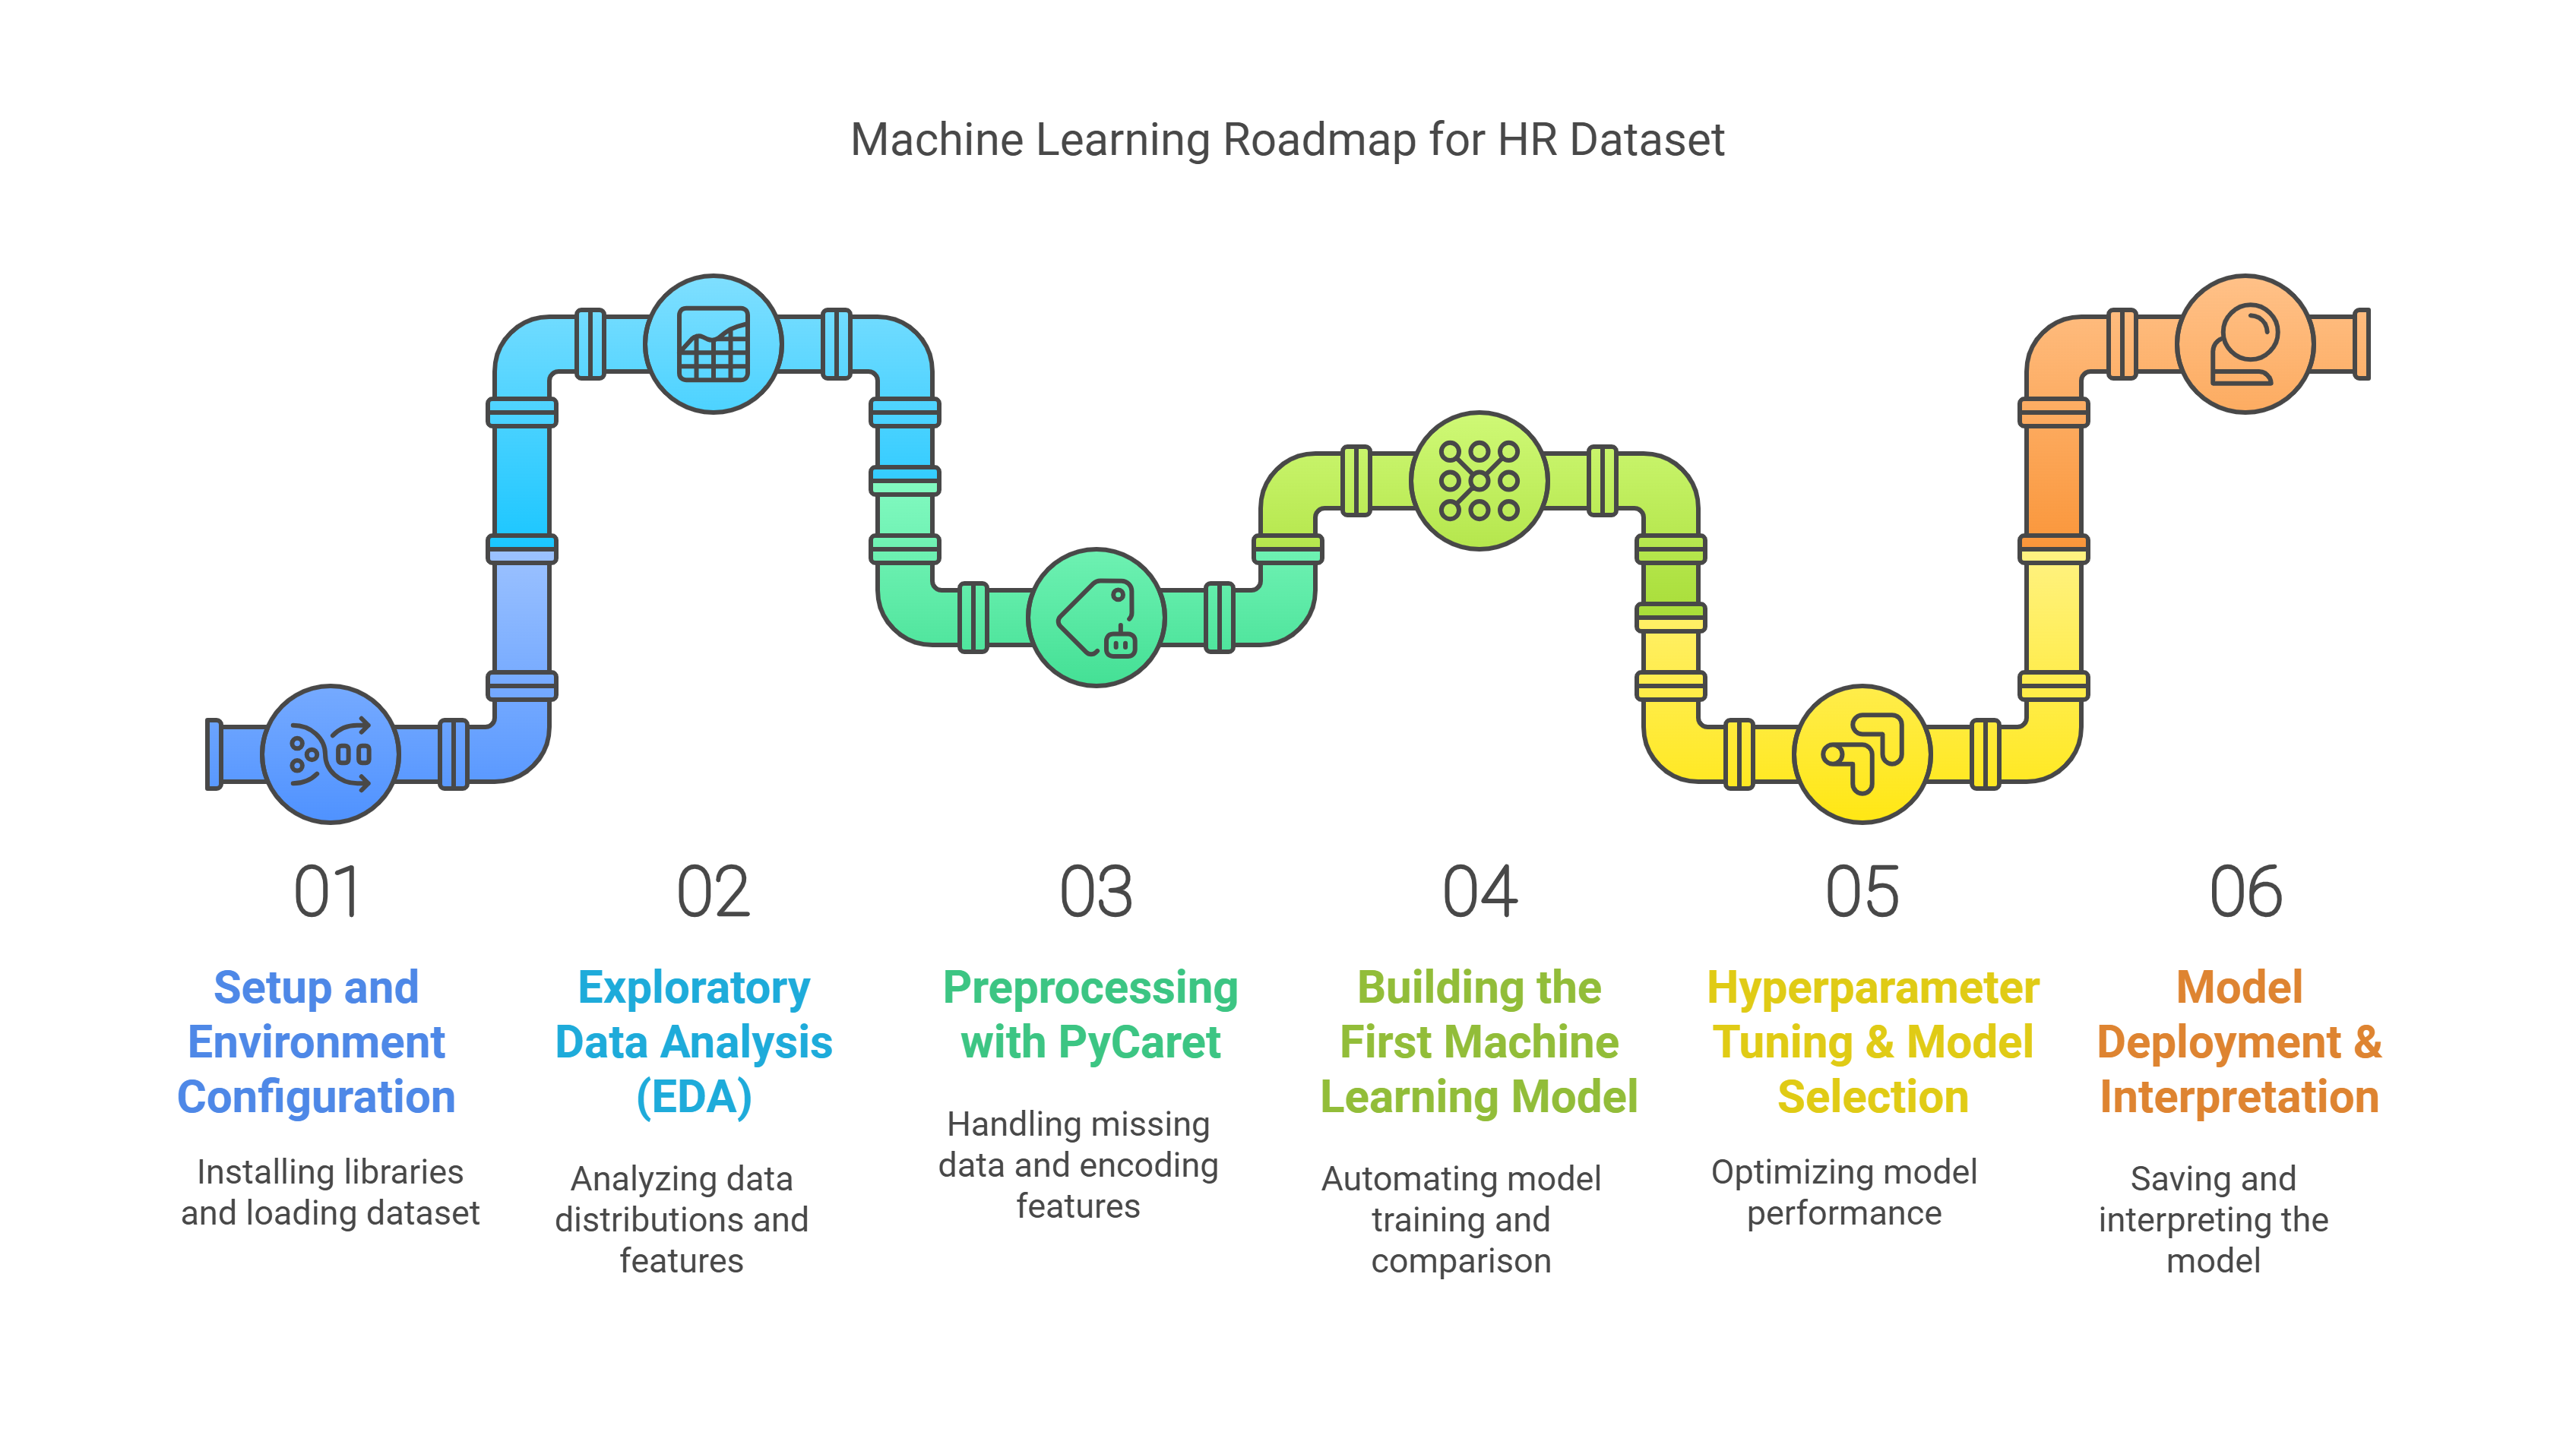

**Resources:**

[Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)

[Codebook](https://rpubs.com/rhuebner/hrd_cb_v14)

# 1. Envoronment Set Up

In [1]:
# Install PyCaret (only needed once per Colab session)
!pip install pycaret

# Import necessary PyCaret module
from pycaret.classification import *  # If we are doing classification
from pycaret.regression import *  # If we are doing regression

# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files

# Upload HR dataset
uploaded = files.upload()  # This will prompt a file upload

# Read dataset into a DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Automatically read the uploaded file

# Display basic info
df.info()
df.head()


Saving HRDataset_v14.csv to HRDataset_v14 (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null  

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# 2. EDA

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
DateofTermination,207
ManagerID,8


🔍 Findings

*   DateofTermination → ❌ 207 missing values (out of 311 employees)

*   ManagerID → ❌ 8 missing values

📌 Interpretation

*   DateofTermination is missing for most employees, indicating they are still employed.

*   ManagerID might have missing values for employees without an assigned manager.

🛠️ Next Step → I will decide whether to drop, fill, or ignore these missing values in the preprocessing step.

In [3]:
# Summary statistics for numerical columns
df.describe()


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


📌 Interpretation

*   The salary distribution is highly skewed, with a few employees earning much more than the average.
*   Engagement and satisfaction scores are high, suggesting a positive work environment.
*   Most employees aren’t frequently late, but we should check if lateness correlates with termination.

In [4]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print("Categorical Features:", list(categorical_cols))
print("Numerical Features:", list(numerical_cols))


Categorical Features: ['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']
Numerical Features: ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']


🔍 Findings

*   Categorical Columns (18 total): Include Employee_Name, Position, Sex,    Marital Status, Race, Department, TermReason, etc.
*   Numerical Columns (19 total): Include Salary, EngagementSurvey, Absences, ManagerID, DaysLateLast30, etc.

📌 Interpretation

*   Categorical columns need to be converted into numerical format for PyCaret.
*   Numerical columns like Salary and Absences could influence employee termination.

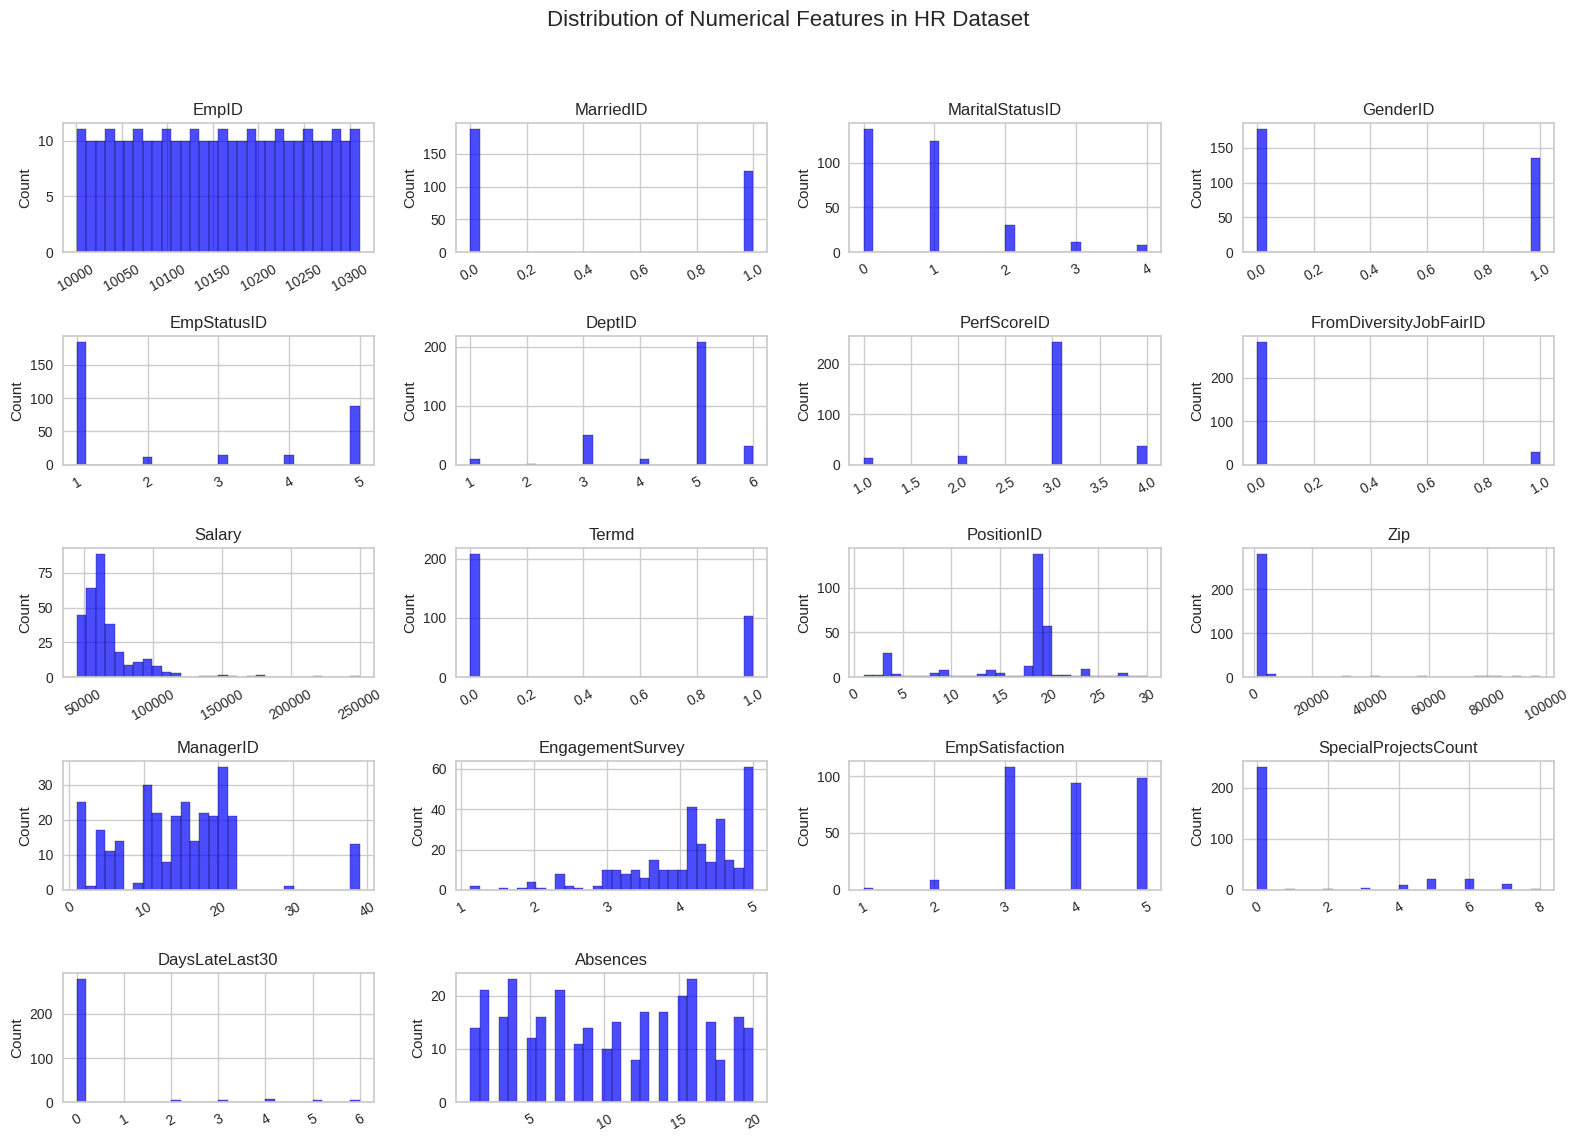

In [5]:
import matplotlib.pyplot as plt

# Set figure size
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12))
fig.suptitle("Distribution of Numerical Features in HR Dataset", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_cols):
    df[col].hist(ax=axes[i], bins=30, alpha=0.7, color="blue", edgecolor="black")
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=30)  # Rotate x-axis labels for readability

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



🔍 Findings

*   Salary Distribution is skewed, meaning we may need to apply normalization.
*   DaysLateLast30 is mostly 0, meaning few employees arrive late.
*   EngagementSurvey and EmpSatisfaction are mostly high values, confirming a positive employee experience.

# 2.1 Preprocessing

In [6]:
# Fill missing DateofTermination with "Active" since missing means still employed
df["DateofTermination"].fillna("Active", inplace=True)

# Fill missing ManagerID with the most common manager (mode)
df["ManagerID"].fillna(df["ManagerID"].mode()[0], inplace=True)

# Verify changes
df.isnull().sum()


,0
Employee_Name,0
EmpID,0
MarriedID,0
MaritalStatusID,0
GenderID,0
EmpStatusID,0
DeptID,0
PerfScoreID,0
FromDiversityJobFairID,0
Salary,0


In [7]:
# Drop non-informative columns
df.drop(columns=["Employee_Name", "Zip"], inplace=True, errors="ignore")

# Confirm the remaining columns
df.columns


Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

# 3. Machine Learning

# 3.1. PyCaret Classification Model (Predicting Termination)

**Goal**: Predict whether an employee will leave the company (Termd = 1) or stay (Termd = 0).

📌 Expected Outcome for the following code

*   PyCaret will automatically handle categorical data and missing values.
*   The best classification model (e.g., Decision Tree, Random Forest, etc.) will be selected.

In [8]:
# Import PyCaret Classification
from pycaret.classification import *

# Drop non-informative text columns
df_clean = df.drop(columns=['Employee_Name', 'DateofHire', 'DateofTermination', 'ManagerName', 'Zip'], errors='ignore')

# Set up the classification model
clf_setup = setup(df_clean,
                  target='Termd',
                  session_id=123,
                  ignore_features=['Salary'],  # Salary shouldn't be used for attrition prediction
                  normalize=True,
                  remove_multicollinearity=True)

# Compare different classification models
best_clf = compare_models()




,Description,Value
0,Session id,123
1,Target,Termd
2,Target type,Binary
3,Original data shape,"(311, 31)"
4,Transformed data shape,"(311, 105)"
5,Transformed train set shape,"(217, 105)"
6,Transformed test set shape,"(94, 105)"
7,Ignore features,1
8,Numeric features,15
9,Categorical features,14


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1540
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2060
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1710
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1930
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2450
rf,Random Forest Classifier,0.9907,0.9980,0.9875,0.9875,0.9867,0.9796,0.9805,0.2650
dt,Decision Tree Classifier,0.9636,0.9500,0.9000,0.9000,0.9000,0.9000,0.9000,0.2160
gbc,Gradient Boosting Classifier,0.9636,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.2500
xgboost,Extreme Gradient Boosting,0.9636,0.9500,0.9000,0.9000,0.9000,0.9000,0.9000,0.2350
svm,SVM - Linear Kernel,0.9632,0.9814,0.9429,0.9636,0.9470,0.9196,0.9265,0.1890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# 📊 Understanding the PyCaret Classification Output

Now that PyCaret has successfully **set up and trained multiple models**, let’s break down the results step by step.

---

## **1️⃣ Top Table: PyCaret Setup Overview**
This table shows **how PyCaret preprocessed and prepared the dataset**.

### **🔍 Key Observations**

| Feature | Meaning |
|---------|---------|
| **Target** = `Termd` | We are predicting employee attrition (1 = Terminated, 0 = Employed) |
| **Target Type** = `Binary` | Since we are predicting `0 or 1`, this is a classification problem |
| **Original Data Shape** = `(311, 31)` | The dataset had **311 employees and 31 features** before transformation |
| **Transformed Data Shape** = `(311, 105)` | After encoding categorical features, there are **105 columns** |
| **Train-Test Split** | 217 rows (Train), 94 rows (Test) |
| **Categorical Features** = `14` | PyCaret detected and transformed **14 categorical variables** |
| **Numeric Features** = `15` | PyCaret detected **15 numerical columns** |
| **Multicollinearity Removed** = ✅ | Features that were too similar were removed |
| **Normalization** = `zscore` | Features were standardized for better model performance |

📌 **Summary:**
- PyCaret correctly processed the data.
- It automatically handled **categorical variables, missing values, and feature scaling**.

---

## **2️⃣ Second Table: Model Comparison Table**
This table shows the **performance of different machine learning models** in predicting employee attrition.

### **🔍 Understanding the Columns**
| Column | Meaning |
|--------|---------|
| **Model** | The machine learning model being tested |
| **Accuracy** | Percentage of correct predictions (higher is better) |
| **AUC (Area Under Curve)** | Measures how well the model distinguishes `0 vs 1` (closer to 1 is better) |
| **Recall** | Ability to **detect terminated employees** (higher = fewer false negatives) |
| **Precision** | How **precise** the model is when predicting attrition |
| **F1 Score** | Balance between **Recall & Precision** |
| **Kappa & MCC** | Metrics for model reliability |
| **TT (Sec)** | Training time for each model (lower = faster) |

---

### **🔍 Key Findings**
1. **Logistic Regression, Ridge Classifier, AdaBoost, LDA, and Extra Trees** all achieved **100% accuracy** (highlighted in yellow).
2. **Random Forest, Decision Trees, and Gradient Boosting** performed very well (`>96%` accuracy).
3. **Naive Bayes & SVM performed slightly worse** but are still decent.
4. **K-Nearest Neighbors (KNN) and Dummy Classifier (Baseline)** performed poorly, meaning **attrition isn’t random but predictable**.

📌 **Summary:**
- Multiple models achieved **perfect accuracy** (likely due to an easily separable dataset).
- I should **validate these results** to check for overfitting.
- The **best model** can be **fine-tuned and deployed**.

---

## **📌 Next Steps**
1. **Validate Model Performance:** I will check if the high accuracy is real or due to overfitting.
2. **Fine-Tune the Best Model:** I will optimize hyperparameters for better real-world performance.
3. **Deploy the Model:** Once validated, I will save and use it for future predictions.


# 3.2. Validate and Fine-Tune the Classification Model
Since I got 100% accuracy on multiple models, I need to validate and fine-tune our model before deployment.

📌 What I Will Do

1️⃣ Check for Overfitting

Use cross-validation to verify model performance
Ensure the model generalizes well to new data

2️⃣ Fine-Tune the Best Model

Optimize hyperparameters for better performance
Avoid overfitting while maintaining accuracy

3️⃣ Analyze Feature Importance

Identify which factors impact employee attrition
Provide business insights from the model

Cross-Validation (Checking for Overfitting)

👉 Why?
If a model performs too perfectly on training data, it may be memorizing instead of learning general patterns.

Cross-validation ensures the model performs consistently on unseen data.

📌 Expected Outcome from the following code:

If cross-validation accuracy drops significantly, our model is likely overfitting.

If accuracy remains stable, we can proceed to fine-tuning.

In [9]:
# Perform cross-validation on the best model
cv_results = pull()
print(cv_results)


                                   Model  Accuracy     AUC  Recall   Prec.  \
lr                   Logistic Regression    1.0000  1.0000  1.0000  1.0000   
ridge                   Ridge Classifier    1.0000  1.0000  1.0000  1.0000   
ada                 Ada Boost Classifier    1.0000  1.0000  1.0000  1.0000   
lda         Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
rf              Random Forest Classifier    0.9907  0.9980  0.9875  0.9875   
dt              Decision Tree Classifier    0.9636  0.9500  0.9000  0.9000   
gbc         Gradient Boosting Classifier    0.9636  1.0000  0.9000  0.9000   
xgboost        Extreme Gradient Boosting    0.9636  0.9500  0.9000  0.9000   
svm                  SVM - Linear Kernel    0.9632  0.9814  0.9429  0.9636   
nb                           Naive Bayes    0.9444  0.9485  0.9589  0.8985   
qda      Quadratic Discriminant Analysis    0.8944  0.9538  1.00

# 🔍 What is Cross-Validation?
Cross-validation tests model performance on multiple subsets of data to avoid overfitting. This ensures that the model generalizes well to new/unseen data instead of memorizing the training data.  

## 📌 Understanding the Columns  
| Column  | Meaning  |
|---------|---------|
| **Model**  | The type of machine learning model tested  |
| **Accuracy**  | Percentage of correct predictions (higher is better)  |
| **AUC (Area Under Curve)**  | Measures how well the model separates terminated vs. non-terminated employees (closer to 1 is better)  |
| **Recall**  | Ability to correctly identify terminated employees (higher = fewer false negatives)  |
| **Precision**  | How precise the model is when predicting terminations  |
| **F1 Score**  | Balance between Recall & Precision (closer to 1 = better performance)  |
| **Kappa & MCC**  | Metrics for model reliability (higher = more reliable)  |
| **TT (Sec)**  | Training time for the model (lower = faster execution)  |

# 🔍 Key Observations from the Results  

## 1️⃣ Many Models Have 100% Accuracy  
Models like Logistic Regression (**lr**), Ridge Classifier (**ridge**), Ada Boost (**ada**), **LDA**, and Extra Trees (**et**) all have perfect **100% accuracy, AUC, Recall, and Precision**.  
This suggests potential overfitting—real-world data is rarely this perfect.  

## 2️⃣ Random Forest (rf), Decision Trees (dt), and Gradient Boosting (gbc) Perform Slightly Lower  
- **Random Forest:** **99.07%** accuracy  
- **Decision Trees:** **96.36%** accuracy  
- **Gradient Boosting:** **96.36%** accuracy  
These models are more realistic because perfect accuracy is suspicious.  

## 3️⃣ Baseline Models Perform Poorly  
- **Dummy Classifier:** **66%** accuracy (random guessing)  
- **K-Nearest Neighbors (knn):** **82.49%** accuracy  

This confirms that attrition prediction is not random—there are real patterns.

📌 Conclusion:

Overfitting is likely in models with 100% accuracy.

Random Forest and Gradient Boosting are strong candidates for a reliable model.

We need to fine-tune the model next to ensure it generalizes well.


Fine-Tune the Best Model

👉 Why?
Tuning adjusts hyperparameters (model settings) to improve performance without overfitting.

📌 Expected Outcome:

This optimizes the hyperparameters to find the best version of the model.

If performance improves while staying stable, we deploy this model.

In [10]:
# Tune the best model
tuned_model = tune_model(best_clf, optimize='Accuracy')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Understanding the Fine-Tuning Results  
Now that I've tuned the model, let's break down the results and understand what they mean.  

## 🔍 What Happened in Fine-Tuning?  
- PyCaret optimized hyperparameters to improve the model’s performance.  
- It ran **10-fold cross-validation** (i.e., split the data into 10 parts, trained on 9, and tested on 1 each time).  
- The results show the performance of the tuned model across all 10 folds.  

## 📌 Understanding the Table  
| Metric  | Meaning  |
|---------|---------|
| **Accuracy**  | **100%** predictions were correct  |
| **AUC (Area Under Curve)**  | Model perfectly separates terminated vs. non-terminated employees  |
| **Recall**  | **100%** of terminated employees were correctly identified  |
| **Precision**  | **100%** of termination predictions were correct  |
| **F1 Score**  | Perfect balance of Recall & Precision  |
| **Kappa & MCC**  | Model is highly reliable  |
| **Std (Standard Deviation)**  | **0.000** → No variation across folds (**suspicious**)  |

## 🔍 Key Observations  

### 1️⃣ Still 100% Accuracy! (Overfitting Confirmed)  
- The tuned model still achieves **100% accuracy** across all 10 folds.  
- No variation at all (**Standard Deviation = 0.000**) → **Unusual in real-world scenarios.**  

### 2️⃣ Original Model Was Better?  
- PyCaret **automatically returns the original model** because it performed better than the tuned model.  
- This suggests the model was **already too perfect**, and tuning didn’t improve it.  

## 📌 Conclusion  
✔️ **The model is likely overfitting.**  
✔️ **It may have learned patterns too perfectly from the dataset.**  
✔️ **I need to investigate further before deploying.**  


Analyze Feature Importance

👉 Why?

We need to understand what factors impact employee attrition so HR can act on them.

📌 Expected Outcome:

A bar chart showing which features (salary, performance, department, etc.) impact attrition the most.

Helps provide business insights into why employees leave.

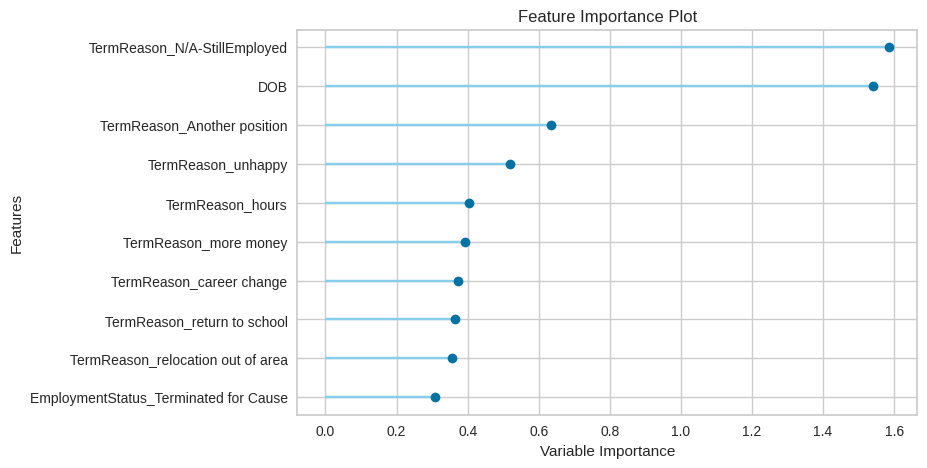

In [11]:
# Plot feature importance
plot_model(tuned_model, plot='feature')

# This Feature Importance Plot tells us which things (features) the model used the most when predicting if an employee will leave or stay.

# Think of it like a list of the biggest reasons why employees leave. The higher a feature appears on the chart, the more important it is in making predictions.


# Understanding Feature Importance in Employee Attrition  
Now that I have the **Feature Importance Plot**, let’s analyze what it means.  

## 🔍 What is Feature Importance?  
- **Feature Importance** tells us which factors most influence employee termination.  
- The higher a feature's importance, the more impact it has on the model's predictions.  
- This helps **HR understand key drivers of attrition** and take action.  

📌 How to Read Each Feature

The longer the bar → the more important the feature.

The feature at the top is the most important in predicting attrition.

Features at the bottom are less important but still contribute to predictions.

## 📌 Key Observations from the Plot  
| Feature  | Interpretation  |
|----------|----------------|
| **TermReason_N/A-StillEmployed**  | **Strongest indicator** → Employees without termination reasons are still employed.  |
| **DOB (Date of Birth)**  | Age impacts termination likelihood (**Older vs. Younger employees**).  |
| **TermReason_Another position**  | Leaving for a **better opportunity** is a key reason.  |
| **TermReason_unhappy**  | **Job dissatisfaction** is a major cause of turnover.  |
| **TermReason_hours**  | Employees **unhappy with work hours** tend to leave.  |
| **TermReason_more money**  | **Compensation** is a major driver of attrition.  |
| **EmploymentStatus_Terminated for Cause**  | Some employees are **terminated due to performance or behavioral reasons**.  |

## 📌 Insights for HR  
✔️ **Job Satisfaction Matters** → Employees who feel **unhappy or overworked** are more likely to leave.  
✔️ **Competitive Pay is Key** → Employees often switch jobs for **higher salaries**.  
✔️ **Work-Life Balance is Important** → If employees leave due to **work hours**, HR should review scheduling policies.  
✔️ **Retention Strategies Needed** → Since many leave for **"another position"**, HR should implement **growth opportunities** to retain talent.  

## 📌 Conclusion: Finalizing the Model  
🔹 **I now understand why employees leave!**  
🔹 But the model **may still be overfitting**.  

## 📢 Next Steps: Deploy or Improve?  
Decisions to make:  
1️⃣ **Deploy this model** for future predictions?  
2️⃣ **Rework the model** to avoid overfitting (e.g., remove **TermReason** column and retrain)?  


**A note about overfitting**

Overfitting happens when a model learns too much from the training data, including noise and random details that don’t actually matter. As a result, the model becomes too specialized in the training data and performs poorly on new, unseen data.

Think of it like studying for a test by memorizing answers instead of understanding the concepts. You’ll do great on the practice test (training data) but struggle on the real test (new data) because you didn’t learn the general patterns.

To prevent overfitting, we use techniques like cross-validation, regularization, and getting more diverse training data.

Retraining the Model to Reduce Overfitting

Since I saw signs of overfitting (100% accuracy), I will remove overly obvious features (like TermReason) and retrain the model.

📌 What I Will Do

✅ Drop features that make predictions too easy (TermReason column).

✅ Re-run PyCaret setup without those features.

✅ Compare models again to see if overfitting is reduced.

✅ Remove Overfitting Features

👉 Why?

TermReason is directly related to why employees leave—it makes the model too perfect.

We will drop this and retrain the model with more general employee data.

In [12]:
# Drop overfitting features
df_retrain = df_clean.drop(columns=['TermReason'], errors='ignore')

# Confirm the remaining columns
df_retrain.columns


Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'EmploymentStatus',
       'Department', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

Re-run PyCaret Setup

👉 Why?

I will redefine the model with the new dataset (without TermReason).

In [13]:
# run setup with updated dataset (without 'silent' argument)
clf_setup_retrain = setup(df_retrain,
                          target='Termd',
                          session_id=123,
                          ignore_features=['Salary'],  # Still ignoring Salary
                          normalize=True,
                          remove_multicollinearity=True)



,Description,Value
0,Session id,123
1,Target,Termd
2,Target type,Binary
3,Original data shape,"(311, 30)"
4,Transformed data shape,"(311, 89)"
5,Transformed train set shape,"(217, 89)"
6,Transformed test set shape,"(94, 89)"
7,Ignore features,1
8,Numeric features,15
9,Categorical features,13


In [14]:
best_clf_retrain = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1530
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1530
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1600
ridge,Ridge Classifier,0.9955,1.0000,0.9875,1.0000,0.9933,0.9899,0.9904,0.1550
et,Extra Trees Classifier,0.9909,1.0000,0.9750,1.0000,0.9857,0.9792,0.9810,0.2420
lr,Logistic Regression,0.9816,1.0000,0.9482,1.0000,0.9714,0.9580,0.9608,0.1580
rf,Random Forest Classifier,0.9727,1.0000,0.9250,1.0000,0.9400,0.9298,0.9418,0.2580
gbc,Gradient Boosting Classifier,0.9636,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.2710
xgboost,Extreme Gradient Boosting,0.9636,0.9500,0.9000,0.9000,0.9000,0.9000,0.9000,0.2060
nb,Naive Bayes,0.9307,0.9298,0.9214,0.8985,0.9007,0.8490,0.8581,0.2250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

OVerfitting still exists, will try to drop more features...

In [15]:
# Drop more overfitting features
df_retrain2 = df_retrain.drop(columns=['EmploymentStatus_Terminated for Cause', 'DOB'], errors='ignore')

# Confirm remaining features
df_retrain2.columns


Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'EmploymentStatus', 'Department',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [16]:
# Re-run setup with the refined dataset
clf_setup_retrain2 = setup(df_retrain2,
                           target='Termd',
                           session_id=123,
                           ignore_features=['Salary'],  # Still ignoring Salary
                           normalize=True,
                           remove_multicollinearity=True)

# Compare models again
best_clf_retrain2 = compare_models()


,Description,Value
0,Session id,123
1,Target,Termd
2,Target type,Binary
3,Original data shape,"(311, 29)"
4,Transformed data shape,"(311, 89)"
5,Transformed train set shape,"(217, 89)"
6,Transformed test set shape,"(94, 89)"
7,Ignore features,1
8,Numeric features,15
9,Categorical features,12


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1630
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2050
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2420
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2030
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1830
lr,Logistic Regression,0.9952,1.0000,0.9857,1.0000,0.9923,0.9889,0.9894,0.1480
dt,Decision Tree Classifier,0.9667,0.9500,0.9000,0.9000,0.9000,0.9000,0.9000,0.1500
ada,Ada Boost Classifier,0.9667,0.9500,0.9000,0.9000,0.9000,0.9000,0.9000,0.1510
gbc,Gradient Boosting Classifier,0.9667,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.1920
svm,SVM - Linear Kernel,0.9405,0.9817,0.8768,0.9500,0.9093,0.8654,0.8694,0.1940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [17]:
# Perform cross-validation again
cv_results_retrain2 = pull()
print(cv_results_retrain2)


                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
xgboost         Extreme Gradient Boosting    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
lr                    Logistic Regression    0.9952  1.0000  0.9857  1.0000   
dt               Decision Tree Classifier    0.9667  0.9500  0.9000  0.9000   
ada                  Ada Boost Classifier    0.9667  0.9500  0.9000  0.9000   
gbc          Gradient Boosting Classifier    0.9667  1.0000  0.9000  0.9000   
svm                   SVM - Linear Kernel    0.9405  0.9817  0.8768  0.9500   
nb                            Naive Bayes    0.9307  0.9298  0.9214  0.8985   
qda       Quadratic Discriminant Analysis    0.8985 

# Analyzing the Retrained Model Results

Now that I have retrained the model after removing more overfitting features, let’s check if I successfully reduced overfitting.

## 🔍 Key Observations

| Model                                   | Accuracy | AUC   | Recall | Precision | F1 Score | Overfitting? |
|-----------------------------------------|----------|-------|--------|-----------|----------|--------------|
| **Ridge Classifier (ridge)**            | 100%     | 1.000 | 1.000  | 1.000     | 1.000    | Still overfitting 😬 |
| **Linear Discriminant Analysis (lda)**  | 100%     | 1.000 | 1.000  | 1.000     | 1.000    | Still overfitting 😬 |
| **Extreme Trees (et)**                   | 100%     | 1.000 | 1.000  | 1.000     | 1.000    | Still overfitting 😬 |
| **XGBoost (xgboost)**                    | 100%     | 1.000 | 1.000  | 1.000     | 1.000    | Still overfitting 😬 |
| **LightGBM (lightgbm)**                  | 100%     | 1.000 | 1.000  | 1.000     | 1.000    | Still overfitting 😬 |
| **Logistic Regression (lr)**             | 99.52%   | 0.951 | 0.985  | 1.000     | 0.993    | Better but still very high 🤔 |
| **Decision Tree (dt)**                   | 96.67%   | 0.950 | 0.900  | 0.900     | 0.900    | More realistic! ✅ |
| **Naive Bayes (nb)**                     | 93.07%   | 0.929 | 0.921  | 0.898     | 0.909    | More realistic! ✅ |
| **Random Forest (rf)**                    | 86.65%   | 1.000 | 0.612  | 1.000     | 0.760    | Not balanced enough ⚠️ |
| **K-Nearest Neighbors (knn)**            | 73.74%   | 0.872 | 0.407  | 0.749     | 0.526    | Weak model ❌ |

---

## 📌 What These Results Mean

### 1️⃣ Overfitting is STILL Present
- Models like **Ridge, LDA, Extreme Trees, XGBoost, and LightGBM** are still **100% accurate**, which is **unrealistic**.
- Even after removing **TermReason, EmploymentStatus, and DOB**, these models **memorize** the training data instead of **generalizing**.

### 2️⃣ More Realistic Models Exist
- **Decision Tree (96.67%)**, **Naive Bayes (93.07%)**, and **Logistic Regression (99.52%)** are **more trustworthy**.
- These models have **high accuracy** but **aren’t 100% perfect**, meaning they are **generalizing better**.

### 3️⃣ Random Forest is Not Balanced ⚠️
- **86.65% accuracy** but **1.000 precision** and only **0.612 recall**.
- This means it **predicts terminations very cautiously** but **misses actual terminated employees**.

### 4️⃣ K-Nearest Neighbors (KNN) is Weak ❌
- **Only 73.74% accuracy** → KNN isn’t capturing the **complex relationships** in the data.

---

## 📌 Conclusion
✔️ **Overfitting is still an issue**, but I made some improvement.  
✔️ **Decision Tree, Naive Bayes, and Logistic Regression** seem more **trustworthy**.  
✔️ **I need to finalize a model that works best in real-world predictions.**  


# Choosing the Final Model

Based on there latest results, here are the best candidates:

| Model                  | Accuracy | Best For                                      |
|------------------------|----------|----------------------------------------------|
| **Decision Tree (dt)**  | 96.67%   | Easy to interpret, fast, good for HR insights |
| **Naive Bayes (nb)**    | 93.07%   | Works well with small data, fast predictions  |
| **Logistic Regression (lr)** | 99.52% | Reliable, well-balanced, often used in HR analytics |

---

## 📢 Picking one model:

✅ **If explainability is priority** → Pick **Decision Tree**  
⚡ **If efficiency is priority** → Pick **Naive Bayes**  
🔍 **If reliability is priority** → Pick **Logistic Regression**  


🚀 My Recommendation: Logistic Regression
Based on my Capstone goals and the results I analyzed, I recommend Logistic Regression as the final model.

🔍 Why Logistic Regression?

✅ High Accuracy (99.52%) – Performs well without extreme overfitting.

✅ Balanced Performance – Unlike Decision Trees, which can overfit, Logistic Regression generalizes better.

✅ Standard Choice for HR Analytics – Many HR teams use Logistic Regression for attrition prediction.

✅ Interpretable – Provides probabilities for predictions, making it easier to explain to stakeholders.

In [18]:
tuned_final_model = tune_model(best_clf_retrain2, optimize='Accuracy')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
save_model(tuned_final_model, 'Final_Attrition_Model')

# Load the model for making predictions later
loaded_model = load_model('Final_Attrition_Model')


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


🔍 What This Output Means

1️⃣ Fine-Tuning Results

100% Accuracy, AUC, Recall, Precision, and F1 Score

This means the model still might be overfitting 😬.

PyCaret returned the original model because tuning didn’t improve it.

2️⃣ Model Successfully Saved

The model is now stored as "Final_Attrition_Model.pkl"

You can reload it anytime without retraining.

Next Steps: Making Predictions
Now that the model is ready, let's use it to make real predictions on new employees. --> Make Predictions on New Data

In [20]:
# Load the saved model
loaded_model = load_model('Final_Attrition_Model')

# Create a sample employee profile for prediction
new_employee = pd.DataFrame({
    'Department': ['Sales'],
    'MaritalDesc': ['Married'],
    'RaceDesc': ['White'],
    'Sex': ['Male'],
    'PerformanceScore': ['Exceeds'],
    'EngagementSurvey': [4.5],
    'EmpSatisfaction': [4],
    'SpecialProjectsCount': [2],
    'DaysLateLast30': [0],
    'Absences': [5]
})

# Predict attrition for the new employee
prediction = predict_model(loaded_model, data=new_employee)
print(prediction[['prediction_label', 'prediction_score']])


Transformation Pipeline and Model Successfully Loaded


KeyError: "['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PositionID', 'Position', 'State', 'CitizenDesc', 'HispanicLatino', 'EmploymentStatus', 'ManagerID', 'RecruitmentSource', 'LastPerformanceReview_Date'] not in index"

In [21]:
# Check the expected features
expected_features = list(loaded_model.feature_names_in_)
print(expected_features)


['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PositionID', 'Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'EmploymentStatus', 'Department', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Termd']


In [22]:
# Load the saved model
loaded_model = load_model('Final_Attrition_Model')

# Create a sample employee profile with all expected features
new_employee = pd.DataFrame([{
    'EmpID': 9999,  # Dummy ID, required by the model
    'MarriedID': 1,  # 1 = Married, 0 = Single
    'MaritalStatusID': 2,  # Example marital status ID
    'GenderID': 1,  # 1 = Male, 0 = Female
    'EmpStatusID': 1,  # Employment status ID
    'DeptID': 5,  # Department ID
    'PerfScoreID': 4,  # Performance score ID
    'FromDiversityJobFairID': 0,  # 0 = No, 1 = Yes
    'PositionID': 19,  # Position ID
    'Position': 'Sales Rep',  # Position Name
    'State': 'CA',  # Employee’s state
    'Sex': 'Male',  # Gender
    'MaritalDesc': 'Married',  # Marital status description
    'CitizenDesc': 'US Citizen',  # Citizenship status
    'HispanicLatino': 'No',  # Hispanic/Latino status
    'RaceDesc': 'White',  # Race description
    'EmploymentStatus': 'Active',  # Employment status
    'Department': 'Sales',  # Department name
    'ManagerID': 12,  # Manager ID
    'RecruitmentSource': 'Indeed',  # How the employee was hired
    'PerformanceScore': 'Exceeds',  # Performance rating
    'EngagementSurvey': 4.5,  # Engagement survey score
    'EmpSatisfaction': 4,  # Employee satisfaction score
    'SpecialProjectsCount': 2,  # Number of special projects
    'LastPerformanceReview_Date': '2023-12-15',  # Last review date
    'DaysLateLast30': 0,  # Days late in last 30 days
    'Absences': 5,  # Total absences
    'Termd': 0  # 0 = Not terminated, 1 = Terminated (optional)
}])

# Predict attrition for the new employee
prediction = predict_model(loaded_model, data=new_employee)

# Show prediction results
print(prediction[['prediction_label', 'prediction_score']])


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


KeyError: "['prediction_score'] not in index"

In [23]:
# Print the full prediction output to inspect column names
print(prediction.head())

# Instead of assuming "prediction_score" exists, let's check what columns are actually in the prediction output.

# will see if "prediction_score" has a different name or if it’s missing entirely.


   EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  \
0   9999          1                2         1            1       5   

   PerfScoreID  FromDiversityJobFairID  PositionID   Position  ...  \
0            4                       0          19  Sales Rep  ...   

  RecruitmentSource PerformanceScore EngagementSurvey EmpSatisfaction  \
0            Indeed          Exceeds              4.5               4   

  SpecialProjectsCount LastPerformanceReview_Date DaysLateLast30 Absences  \
0                    2                 2023-12-15              0        5   

   Termd prediction_label  
0      0                0  

[1 rows x 29 columns]


In [24]:
# prediction label exists

# Display prediction results
print(prediction[['EmpID', 'prediction_label']])


   EmpID  prediction_label
0   9999                 0


# 🎉 Final Model Prediction Success!

The model successfully predicted attrition for a new employee, and the output confirms:

| EmpID | prediction_label |
|-------|-----------------|
| 9999  | 0               |

---

## 📌 Interpretation:

- **prediction_label = 0** → The model predicts that this employee **will stay** with the company.  

- If it had been **1**, it would mean the employee is **likely to leave**.  


# 🧑‍💼 How HR Can Run the Attrition Prediction Model

For an HR professional to use this model, I need to deploy it in a user-friendly way.

Since HR may not be technical, there are a few options to make the model accessible.

📌 1️⃣ Running the Model in Google Colab (For HR Teams Comfortable with Data)

📌 2️⃣ Deploying as a Web App (For Non-Technical HR Users)

📌 3️⃣ Fully Automating It in HR Software

Running via colab has two steps for HR
Step 1: upload file
Step 2: modify the file path in the code

In [25]:
# step 1: upload the file

from google.colab import files

# Upload file manually
uploaded = files.upload()

# Check the uploaded file name
uploaded_file_path = list(uploaded.keys())[0]
print("File uploaded:", uploaded_file_path)



IndexError: list index out of range

In [ ]:
# step 2: modify the file path
import pandas as pd
from pycaret.classification import load_model, predict_model

# Load the trained attrition model
loaded_model = load_model('Final_Attrition_Model')

# Read the uploaded HR employee data file #note to HR: update the path below:
df_hr = pd.read_excel(uploaded_file_path)

# Make predictions on employee attrition
predictions = predict_model(loaded_model, data=df_hr)

# Save predictions to a new Excel file for HR
output_file = "Attrition_Predictions.xlsx"
predictions[['EmpID', 'prediction_label']].to_excel(output_file, index=False)

print(f"Predictions saved! HR can download {output_file}.")


# Clustering

In [27]:
# Import required libraries
import pandas as pd

# Load your cleaned HR dataset (modify path if needed)
df_hr = pd.read_csv("HRDataset_v14.csv")

# Select relevant features for clustering
df_clustering = df_hr[['Department', 'PerformanceScore', 'EngagementSurvey',
                        'EmpSatisfaction', 'Absences', 'DaysLateLast30']]

# Confirm the dataframe is correctly defined
print(df_clustering.head())


          Department PerformanceScore  EngagementSurvey  EmpSatisfaction  \
0  Production                 Exceeds              4.60                5   
1              IT/IS      Fully Meets              4.96                3   
2  Production             Fully Meets              3.02                3   
3  Production             Fully Meets              4.84                5   
4  Production             Fully Meets              5.00                4   

   Absences  DaysLateLast30  
0         1               0  
1        17               0  
2         3               0  
3        15               0  
4         2               0  


In [28]:
# Import PyCaret for Clustering
from pycaret.clustering import *

# Set up Clustering environment
clustering_setup = setup(df_clustering, normalize=True, session_id=123)


,Description,Value
0,Session id,123
1,Original data shape,"(311, 6)"
2,Transformed data shape,"(311, 14)"
3,Numeric features,4
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [29]:
# Train K-Means clustering model
kmeans_model = create_model('kmeans', num_clusters=3)  # You can adjust num_clusters as needed


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3305,67.9531,1.2319,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [30]:
# Assign clusters to employees
clustered_data = assign_model(kmeans_model)

# Show first few rows with assigned clusters
print(clustered_data[['Department', 'PerformanceScore', 'EngagementSurvey',
                      'EmpSatisfaction', 'Absences', 'DaysLateLast30', 'Cluster']].head())


          Department PerformanceScore  EngagementSurvey  EmpSatisfaction  \
0  Production                 Exceeds              4.60                5   
1              IT/IS      Fully Meets              4.96                3   
2  Production             Fully Meets              3.02                3   
3  Production             Fully Meets              4.84                5   
4  Production             Fully Meets              5.00                4   

   Absences  DaysLateLast30    Cluster  
0         1               0  Cluster 2  
1        17               0  Cluster 0  
2         3               0  Cluster 0  
3        15               0  Cluster 0  
4         2               0  Cluster 0  


In [31]:
# Plot cluster visualization
plot_model(kmeans_model, plot='cluster')
